In [56]:
#pip install xgboost
#pip install lightgbm

In [57]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [58]:
df = pd.read_csv("Dataset.csv")

In [59]:
print("Shape :",df.shape)

Shape : (17379, 17)


In [60]:
print("Column names & dtypes:\n",df.dtypes)

Column names & dtypes:
 instant        int64
dteday        object
season        object
yr            object
mnth          object
hr             int64
holiday       object
weekday        int64
workingday    object
weathersit    object
temp          object
atemp         object
hum           object
windspeed     object
casual        object
registered    object
cnt            int64
dtype: object


Rename the columns for better understanding of variables

In [61]:
df.rename(columns={'instant':'rec_id','dteday':'datetime','hr':'hours','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'count'},inplace=True)

In [62]:
display(df.head())

,rec_id,datetime,season,year,month,hours,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


In [63]:
display(df.tail())

,rec_id,datetime,season,year,month,hours,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
17374,17375,31-12-2012,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,11,108,119
17375,17376,31-12-2012,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,8,81,89
17376,17377,31-12-2012,springer,2012,12,21,No,1,Working Day,Clear,?,0.2576,0.6,0.1642,7,83,90
17377,17378,31-12-2012,springer,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,31-12-2012,springer,2012,12,23,No,1,?,Clear,0.26,0.2727,0.65,0.1343,12,37,49


In [64]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rec_id             17379 non-null  int64 
 1   datetime           17379 non-null  object
 2   season             17379 non-null  object
 3   year               17379 non-null  object
 4   month              17379 non-null  object
 5   hours              17379 non-null  int64 
 6   holiday            17379 non-null  object
 7   weekday            17379 non-null  int64 
 8   workingday         17379 non-null  object
 9   weather_condition  17379 non-null  object
 10  temp               17379 non-null  object
 11  atemp              17379 non-null  object
 12  humidity           17379 non-null  object
 13  windspeed          17379 non-null  object
 14  casual             17379 non-null  object
 15  registered         17379 non-null  object
 16  count              17379 non-null  int64

None

In [65]:
missing = df.isna().sum()
display ("Missing per values in column:",missing[missing>0])

'Missing per values in column:'

Series([], dtype: int64)

In [66]:
display("unique season :", df["season"].unique())

'unique season :'

array(['springer', '?', 'summer', 'fall', 'winter'], dtype=object)

In [67]:
display("Unique year :",df["year"].unique())

'Unique year :'

array(['2011', '?', '2012'], dtype=object)

In [68]:
display("Unique working days :",df["workingday"].unique())

'Unique working days :'

array(['No work', 'Working Day', '?'], dtype=object)

In [69]:
display("Unique weathersit :",df["weather_condition"].unique())

'Unique weathersit :'

array(['Clear', 'Mist', '?', 'Light Snow', 'Heavy Rain'], dtype=object)

In [70]:
print("missing-value % per column :",(df.isna().sum()/len(df)*100).round(2))

missing-value % per column : rec_id               0.0
datetime             0.0
season               0.0
year                 0.0
month                0.0
hours                0.0
holiday              0.0
weekday              0.0
workingday           0.0
weather_condition    0.0
temp                 0.0
atemp                0.0
humidity             0.0
windspeed            0.0
casual               0.0
registered           0.0
count                0.0
dtype: float64


In [71]:
dup_mask = df.duplicated(subset=None, keep='first')
print (f"Duplicated rows: {dup_mask.sum()} ({dup_mask.mean() *100:.2f} %)")
if dup_mask.sum():
    df = df[~dup_mask].reset_index(drop=True)
    print("Duplicates removed.")

Duplicated rows: 0 (0.00 %)


In [72]:
for col in df.columns:
    if df[col].dtype in ["object", "int64"]:
        unique = df[col].unique()
        if "?" in unique:
            print(f"{col}")
            df[col]=df[col].replace('?',np.nan)

season
year
month
holiday
workingday
weather_condition
temp
atemp
humidity
windspeed
casual
registered


In [73]:
df["datetime"] = pd.to_datetime(df["datetime"], format='%d-%m-%Y')

In [74]:
numeric_cols = ['temp','atemp','humidity','windspeed','casual','registered','count']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [75]:
display("numberical Describe",df.describe(include = [np.number]).T)

'numberical Describe'

,count,mean,std,min,25%,50%,75%,max
rec_id,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
hours,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
temp,17368.0,0.497132,0.192525,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17373.0,0.475851,0.171829,0.00,0.3333,0.4848,0.6212,1.0000
humidity,17373.0,0.627208,0.192939,0.00,0.4800,0.6300,0.7800,1.0000
windspeed,17374.0,0.190080,0.122321,0.00,0.1045,0.1940,0.2537,0.8507
casual,17378.0,35.676603,49.306423,0.00,4.0000,17.0000,48.0000,367.0000
registered,17378.0,153.792554,151.359786,0.00,34.0000,115.0000,220.0000,886.0000
count,17379.0,189.463088,181.387599,1.00,40.0000,142.0000,281.0000,977.0000


In [76]:
display("Categoric Describe",df.describe(include = [object]))

'Categoric Describe'

,season,year,month,holiday,workingday,weather_condition
count,17373,17378,17378,17378,17374,17375
unique,4,2,12,2,2,4
top,fall,2012,5,No,Working Day,Clear
freq,4496,8734,1488,16878,11862,11412


In [77]:
print("\nMissing % after coercion:\n", (df.isna().sum()/len(df)*100).round(2))


Missing % after coercion:
 rec_id               0.00
datetime             0.00
season               0.03
year                 0.01
month                0.01
hours                0.00
holiday              0.01
weekday              0.00
workingday           0.03
weather_condition    0.02
temp                 0.06
atemp                0.03
humidity             0.03
windspeed            0.03
casual               0.01
registered           0.01
count                0.00
dtype: float64


In [78]:
from sklearn.impute import KNNImputer

def fill_all(df_):
    weather = ['temp','atemp','humidity','windspeed']
    knn = KNNImputer(n_neighbors=5)
    df[weather] = knn.fit_transform(df[weather])
    
    cats = ['season','holiday','workingday','weather_condition','year','month']
    for col in cats:
        mode_val = df[col].mode()[0]      
        df[col] = df[col].fillna(mode_val)
    
    num = ['count']
    for col in num:
        med = df[col].median()
        df[col] = df[col].fillna(med)
    
    return df
    
df = fill_all(df)

In [79]:
def impute_casual_registered(df_):
    df_['casual'] = df_.groupby(['hours','weather_condition'])['casual'].transform(
        lambda x: x.fillna(x.median()))
    df_['registered'] = df_.groupby(['hours','weather_condition'])['registered'].transform(
        lambda x: x.fillna(x.median()))
    return df_
df = impute_casual_registered(df)
df['count'] = df['casual'] + df['registered']

In [80]:
if df[numeric_cols].isna().sum().sum() == 0:
    print("All missing values resolved.")
else:
    print("Warning: Missing values still present!")

All missing values resolved.


In [81]:
df.shape

(17379, 17)

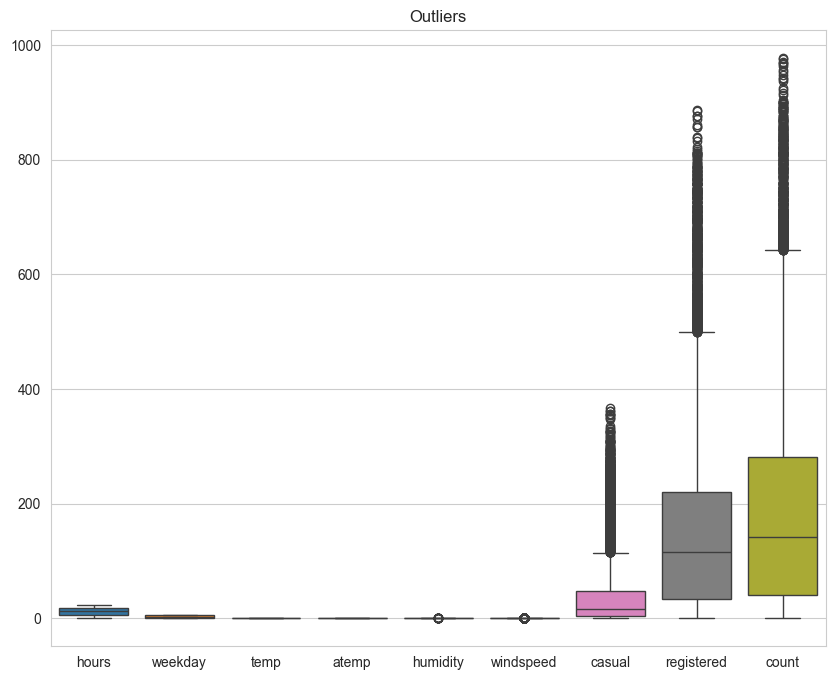

In [82]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df.drop("rec_id", axis=1))
plt.title("Outliers")
plt.savefig("outliers.png")

the box plot, we can observed that outliers are present in,humidity,windspeed,casual,registered,count variable.

In [83]:
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1                

    lower_bound = Q1 - 1.5 * IQR   
    upper_bound = Q3 + 1.5 * IQR  

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]  
    print(f"Outliers detected in {col}: {outliers.shape[0]}")

Outliers detected in rec_id: 0
Outliers detected in hours: 0
Outliers detected in weekday: 0
Outliers detected in temp: 0
Outliers detected in atemp: 0
Outliers detected in humidity: 22
Outliers detected in windspeed: 341
Outliers detected in casual: 1192
Outliers detected in registered: 680
Outliers detected in count: 505


In [84]:
df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [85]:
df.shape

(16874, 17)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16874 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             16874 non-null  int64         
 1   datetime           16874 non-null  datetime64[ns]
 2   season             16874 non-null  object        
 3   year               16874 non-null  object        
 4   month              16874 non-null  object        
 5   hours              16874 non-null  int64         
 6   holiday            16874 non-null  object        
 7   weekday            16874 non-null  int64         
 8   workingday         16874 non-null  object        
 9   weather_condition  16874 non-null  object        
 10  temp               16874 non-null  float64       
 11  atemp              16874 non-null  float64       
 12  humidity           16874 non-null  float64       
 13  windspeed          16874 non-null  float64       
 14  casual

In [87]:
df['hour_sin'] = np.sin(2 * np.pi * df['hours'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hours'] / 24)
df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)

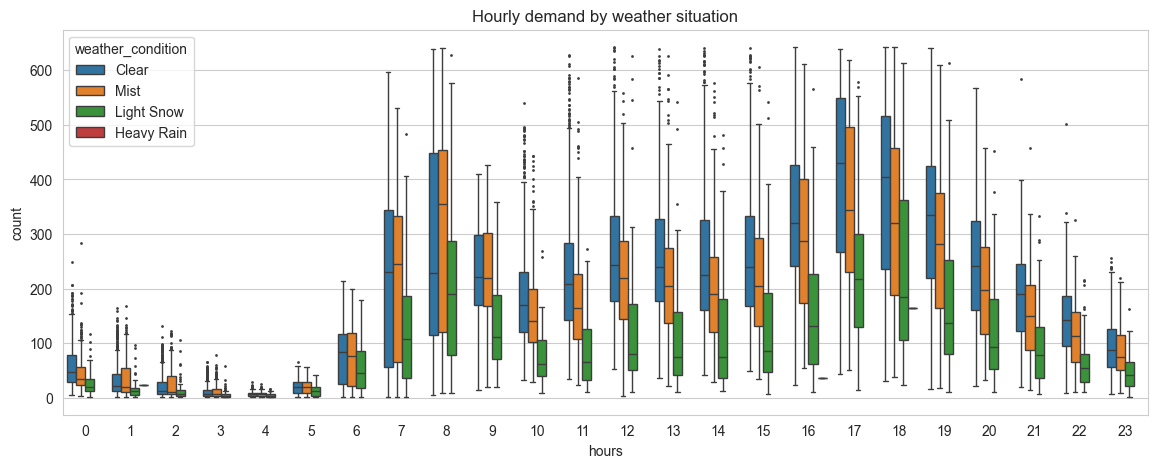

In [88]:
plt.figure(figsize=(14,5))
sns.boxplot(x='hours', y='count', hue='weather_condition', data=df, fliersize=1)
plt.title("Hourly demand by weather situation")
plt.savefig("hourly_demand_weather.png")

- Clear weather consistently shows the highest demand during peak commuting hours — morning and evening.
- Mist allows moderate activity, but with more variability.
- Light snow and heavy rain suppress demand across all hours, especially during peak times.


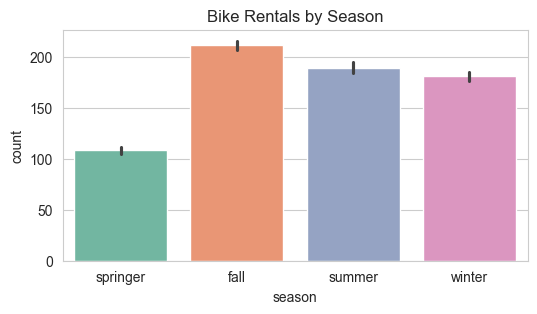

In [89]:
plt.figure(figsize=(6,3))
sns.barplot(x='season', y='count', data=df,color ="0.4",palette="Set2")
plt.title("Bike Rentals by Season")
plt.savefig("bike_rentals_season.png")

 * Fall leads in rentals, suggesting comfortable temperatures and dry conditions are optimal for biking.
 * Summer and winter show similar rental volumes, but likely driven by different user behaviors (e.g., tourists vs commuters).
 * Spring’s low count may reflect early-season hesitation or fewer casual riders.


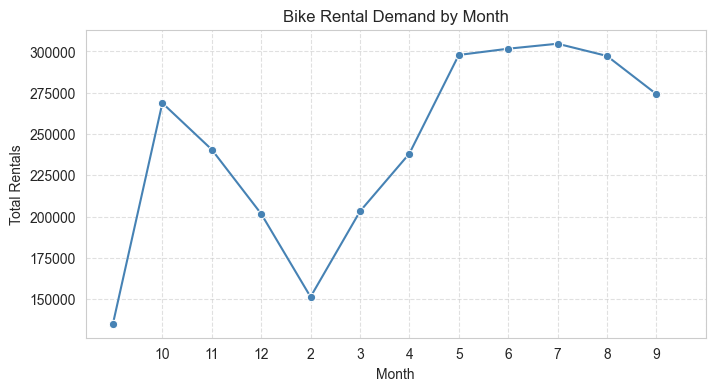

In [90]:
plt.figure(figsize=(8,4))
sns.lineplot(x='month', y='count', data = df.groupby('month')['count'].sum().reset_index(), marker='o', color='steelblue')
plt.title("Bike Rental Demand by Month")
plt.xlabel("Month")
plt.ylabel("Total Rentals")
plt.xticks(range(1,13))  # months 1–12
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig("bike_rentals_month_lineplot.png")
plt.show()


- Rentals peak in summer months (May–August), aligning with favorable weather.
- Winter months (December–February) show the lowest activity.
- Spring and fall offer steady but moderate usage, suggesting transitional weather still supports biking.


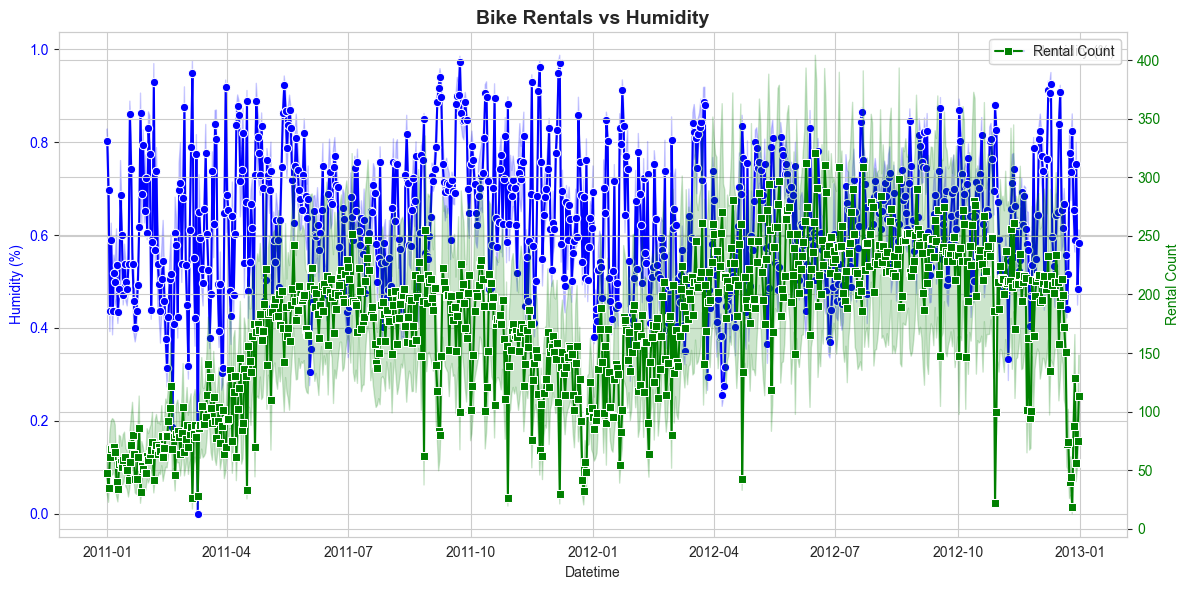

In [91]:
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.set_style("whitegrid")

sns.lineplot(x='datetime', y='humidity', data=df, ax=ax1, color='blue', label='Humidity (%)', marker='o')
ax1.set_ylabel("Humidity (%)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


ax2 = ax1.twinx()
sns.lineplot(x='datetime', y='count', data=df, ax=ax2, color='green', label='Rental Count', marker='s')
ax2.set_ylabel("Rental Count", color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title("Bike Rentals vs Humidity", fontsize=14, fontweight='bold')
ax1.set_xlabel("Datetime")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("bike_rentals_vs_humidity.png")
plt.show()

	Seasonal patterns: You may notice peaks and dips in rentals that align with weather changes  lower rentals during high humidity or rainy seasons.
• 	Possible inverse relationship: If rentals drop when humidity rises, it suggests that humid conditions discourage biking.
• 	Trend tracking: You can observe how both metrics evolve over time, helping identify long-term shifts or anomalies.

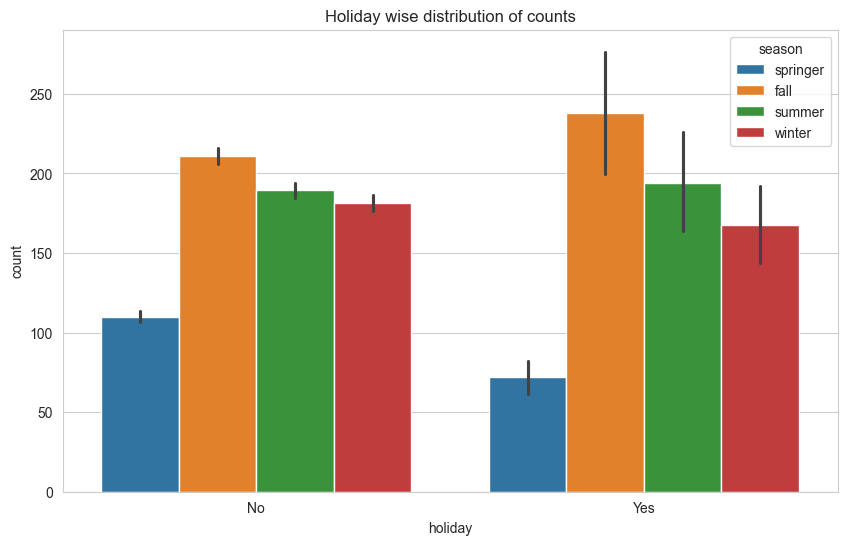

<Figure size 640x480 with 0 Axes>

In [92]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=df,x='holiday',y='count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()
plt.savefig("holiday_season_distribution.png")

the above bar plot, we can observed that during no holiday the bike rental counts is highest compared to during holiday for different seasons.

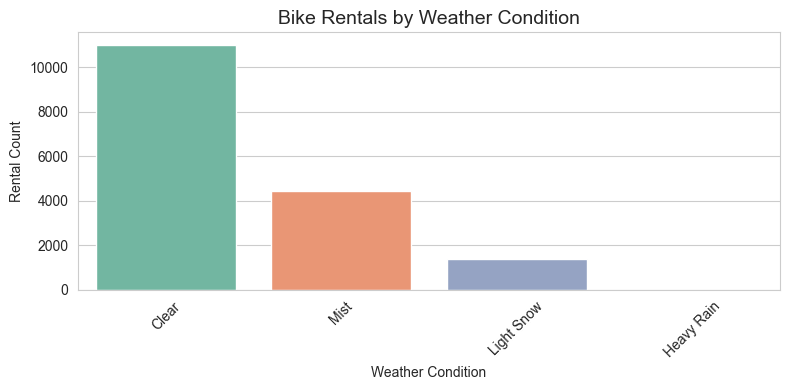

In [93]:
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
sns.countplot(x='weather_condition', data=df, palette='Set2')
plt.title("Bike Rentals by Weather Condition", fontsize=14)
plt.xlabel("Weather Condition")
plt.ylabel("Rental Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Clear weather drives the highest bike rentals — over 10,000 rides. This suggests ideal biking conditions lead to strong demand.
- Mist still sees moderate usage — around 4,500 rentals — indicating that light fog or haze doesn’t deter riders significantly.
- Light snow causes a sharp drop — rentals fall to around 1,500, showing cold or slippery conditions reduce biking.
- Heavy rain shows virtually no rentals — confirming that severe weather is a major deterrent.


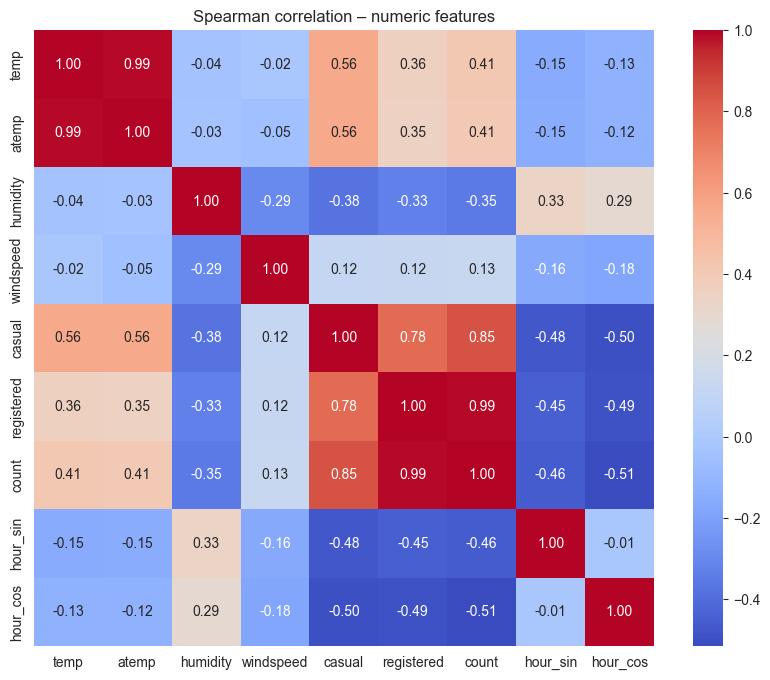

In [94]:
plt.figure(figsize=(10,8))
corr = df[numeric_cols + ['hour_sin','hour_cos']].corr(method='spearman')
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Spearman correlation – numeric features")
plt.savefig("spearman_correlation.png")

From correlation plot, we can observed that some features are positively correlated or some are negatively correlated to each other. The temp and atemp are highly positively correlated to each other, it means that both are carrying same information.The count,casual and registered are highly positively correlated to each other. So, we are going to ignore atemp,casual and registered variable for further analysis

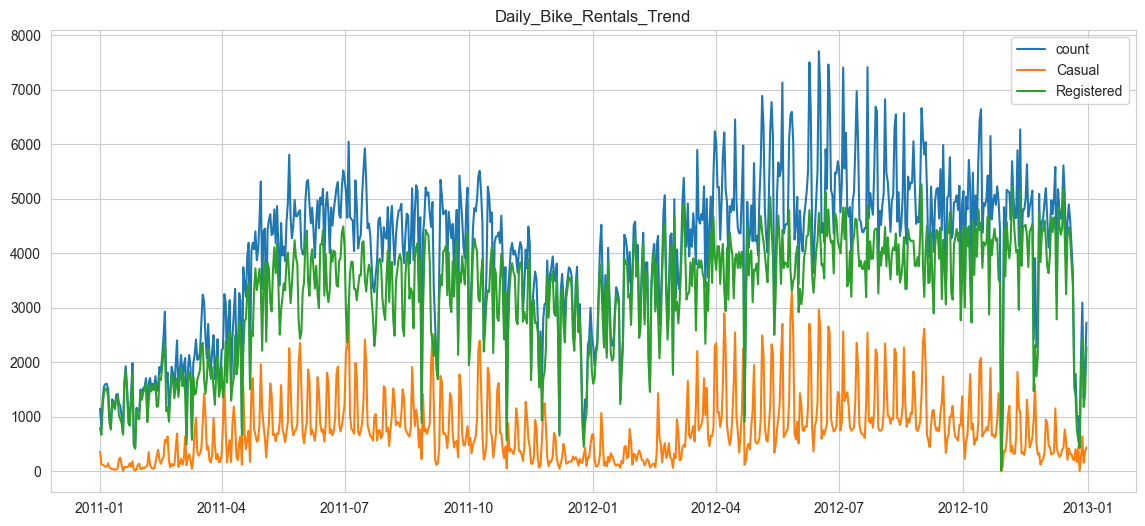

In [95]:
daily = df.groupby('datetime')[['count','casual','registered']].sum().reset_index()
plt.figure(figsize=(14,6))
plt.plot(daily['datetime'], daily['count'], label='count')
plt.plot(daily['datetime'], daily['casual'], label='Casual')
plt.plot(daily['datetime'], daily['registered'], label='Registered')
plt.title("Daily_Bike_Rentals_Trend")
plt.legend()
plt.savefig("daily_bike_rentals_trend.png")

Blue line (count): Overall demand for bike rentals each day,
Orange line (Casual): Rentals by non-registered users, often tourists or occasional riders,
Green line (Registered): Rentals by registered users, typically commuters or regular subscribers,
Seasonal pattern is visible: rentals peak in warmer months and dip in winter,
Registered users show consistent usage, while casual users spike on weekends/holidays,
Overall upward trend suggests growing popularity of bike rentals over time.

In [96]:
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df["month_sin"] = np.sin(2*np.pi*df["month"]/12)
df["month_cos"] = np.cos(2*np.pi*df["month"]/12)

In [97]:
df["is_weekend"] = df["weekday"].apply(lambda x: 1 if x in [0,6] else 0)
df["comfort_index"] = (df["temp"] * (1 - df["humidity"])) - df["windspeed"]

In [98]:
df['hour_type'] = df['hours'].apply(
    lambda x: 'Morning' if 6 <= x < 12 else
              'Afternoon' if 12 <= x < 18 else
              'Evening' if 18 <= x < 22 else 'Night'
)

In [99]:
# Despite correlation, the gap adds unique, actionable information
if "temp" in df.columns and "atemp" in df.columns: 
    df["temp_feel_gap"] = df["atemp"] - df["temp"] 

In [100]:
if all(c in df.columns for c in ["windspeed", "temp"]):
    df["wind_temp_ratio"] = df["windspeed"] / (df["temp"] + 1e-6)

In [101]:
df.set_index('datetime', inplace=True)
df.head(1)

,rec_id,season,year,month,hours,holiday,weekday,workingday,weather_condition,temp,...,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos,is_weekend,comfort_index,hour_type,temp_feel_gap,wind_temp_ratio
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1,springer,2011,1,0,No,6,No work,Clear,0.24,...,1.0,-0.781831,0.62349,0.5,0.866025,1,0.0456,Night,0.0479,0.0


In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [103]:
for col in ['season', 'weather_condition', 'holiday', 'workingday', 'hour_type']:
    df[col] = le.fit_transform(df[col])

In [104]:
df.drop(["rec_id","atemp", "temp", "registered", "casual","hours", "month", "weekday"], axis=1, inplace=True)

In [105]:
FEATURES = [
    "season", "year", "holiday", "workingday", "weather_condition",
    "humidity", "windspeed", "hour_sin", "hour_cos",
    "weekday_sin", "weekday_cos", "month_sin", "month_cos", "is_weekend",
    "comfort_index", "hour_type", "temp_feel_gap", "wind_temp_ratio"
]

In [106]:
TARGET_COL = ["count"]

In [111]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [112]:
scaler = StandardScaler()
X = scaler.fit_transform(df[FEATURES])
y = df[TARGET_COL].values.ravel()

# Model Building

Train_Test_Split

In [113]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [115]:
models = {
    "Decision_Tree":DecisionTreeRegressor(random_state= 42),
    "Random_Forest":RandomForestRegressor(random_state=42),
    "GradientBoosting":GradientBoostingRegressor(random_state =42),
    "xgboost":XGBRegressor(objective="reg:squarederror",random_state=42,n_jobs=-1),
    "K_Neighbors_Reg":KNeighborsRegressor(n_neighbors=5),
    "Linear_Regression":LinearRegression(),
    "LightGBM":LGBMRegressor(n_estimators=2000,learning_rate=0.03,num_leaves=31,max_depth=-1,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.0,reg_lambda=0.0,random_state=42)
}

In [116]:
results={}
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test = model.predict(X_test)
    results[name]={
        "MAE":mean_absolute_error(y_test,y_pred_test),
        "MSE":mean_squared_error(y_test,y_pred_test),
        "RMSE":np.sqrt(mean_squared_error(y_test,y_pred_test)),
        "R2": r2_score(y_test,y_pred_test)
    }
print("Intial model Performance:")
for model_name,metrics in results.items():
    print(model_name,metrics)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 920
[LightGBM] [Info] Number of data points in the train set: 13499, number of used features: 18
[LightGBM] [Info] Start training from score 172.424920
Intial model Performance:
Decision_Tree {'MAE': 40.678222222222225, 'MSE': 4615.686222222223, 'RMSE': 67.93884177863369, 'R2': 0.8018800460617707}
Random_Forest {'MAE': 29.478219259259255, 'MSE': 2174.1914077452675, 'RMSE': 46.62822544066273, 'R2': 0.9066767798292836}
GradientBoosting {'MAE': 45.62372001648287, 'MSE': 4035.5968896272193, 'RMSE': 63.52634799535716, 'R2': 0.8267793278414686}
xgboost {'MAE': 26.9593321315006, 'MSE': 1647.0077267289507, 'RMSE': 40.58334297133432, 'R2': 0.929305182535058}
K_Neighbors_Reg {'MAE': 53.452799999999996, 'MSE': 6333.868136296296, 'RMSE': 79.585602

# Hyperparameter Tuning

Decision Tree

In [117]:
DT_params = {
    "max_depth":[5,10,15,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf": [1, 5, 10]
}

In [118]:
DT_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    DT_params, cv=5, scoring="neg_mean_squared_error", n_jobs=-1
)

In [119]:
DT_grid.fit(X_train,y_train)
print("Best Decision Tree Params",DT_grid.best_params_)

Best Decision Tree Params {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 2}


Random Forest

In [120]:
RF_params = {
    "n_estimators": [100, 200,400],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["log2","sqrt", 0.5]
    
}

In [121]:
RF_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    RF_params, cv=5, scoring="neg_mean_squared_error", n_jobs=-1
)

In [123]:
RF_grid.fit(X_train, y_train)
print("Best Random Forest Params:", RF_grid.best_params_)

Best Random Forest Params: {'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


Gradient Boosting

In [124]:
GB_params = {
    "n_estimators": [100, 200,400],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample":[0.8,1.0]
}

In [125]:
GB_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    GB_params, cv=5, scoring="neg_mean_squared_error", n_jobs=-1
)

In [126]:
GB_grid.fit(X_train, y_train)
print("Best Gradient Boosting Params:", GB_grid.best_params_)

Best Gradient Boosting Params: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 400, 'subsample': 0.8}


xgboost

In [127]:
XGB_params = {
    "n_estimators": [100, 200, 400,500],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}


In [129]:
XGB_grid = GridSearchCV(
    estimator=XGBRegressor(objective="reg:squarederror", random_state=42, n_jobs=-1),
    param_grid=XGB_params,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1
)

In [130]:
XGB_grid.fit(X_train, y_train)
print("Best XGBoost Params:", XGB_grid.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best XGBoost Params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.8}


LightGBM Regressor

In [131]:
LGBM_params = {
    "n_estimators": [200, 400,500],
    "learning_rate": [0.05, 0.1],
    "num_leaves": [31, 63],
    "max_depth": [-1, 10],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

In [132]:
LGBM_grid = GridSearchCV(
    LGBMRegressor(random_state=42),
    LGBM_params,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1,
    refit=True
)

In [133]:
LGBM_grid.fit(X_train, y_train)
print("Best LGBM param",LGBM_grid.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000961 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 920
[LightGBM] [Info] Number of data points in the train set: 13499, number of used features: 18
[LightGBM] [Info] Start training from score 172.424920
Best LGBM param {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 500, 'num_leaves': 63, 'subsample': 0.8}


KNeighborsRegressor

In [134]:
KNN_params = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "leaf_size":[30,50,60,80],
    "p": [1, 2]  # Manhattan vs Euclidean
}

In [135]:
KNN_grid = GridSearchCV(KNeighborsRegressor(), 
                        KNN_params, cv=5, 
                        scoring="neg_mean_squared_error",
                        n_jobs=-1)

In [136]:
KNN_grid.fit(X_train, y_train)
print("Best KNN Params:", KNN_grid.best_params_)

Best KNN Params: {'leaf_size': 30, 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


# Model Evaluation

In [137]:
Best_models = {
    "DecisionTree": DT_grid.best_estimator_,
    "RandomForest": RF_grid.best_estimator_,
    "GradientBoosting": GB_grid.best_estimator_,
    "Xgboost":XGB_grid.best_estimator_,
    "LightGBM":LGBM_grid.best_estimator_,
    "KNeighborsRegressor":KNN_grid.best_estimator_
}

In [138]:
Final_results ={}
for name,model in Best_models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    Final_results[name]={
        "MAE_test": mean_absolute_error(y_test, y_pred_test),
        "MAE_train":mean_absolute_error(y_train, y_pred_train),
        "MSE": mean_squared_error(y_test, y_pred_test),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test)),
        "R2": r2_score(y_test, y_pred_test)
    }

In [139]:
df_models = pd.DataFrame(Final_results).T.reset_index()
df_models.rename(columns={'index':'Best_Models'}, inplace=True)

print("Final Tuned Model Performance:")
display(df_models)


Final Tuned Model Performance:


,Best_Models,MAE_test,MAE_train,MSE,RMSE,R2
0,DecisionTree,39.528103,29.966569,4048.694124,63.629350,0.826217
1,RandomForest,28.683598,10.488296,2021.989649,44.966539,0.913210
2,GradientBoosting,24.251861,13.170957,1423.164617,37.724854,0.938913
3,Xgboost,24.027193,12.480644,1388.639386,37.264452,0.940395
4,LightGBM,24.144304,14.510103,1392.720653,37.319173,0.940220
5,KNeighborsRegressor,48.538624,0.003111,5057.537229,71.116364,0.782914


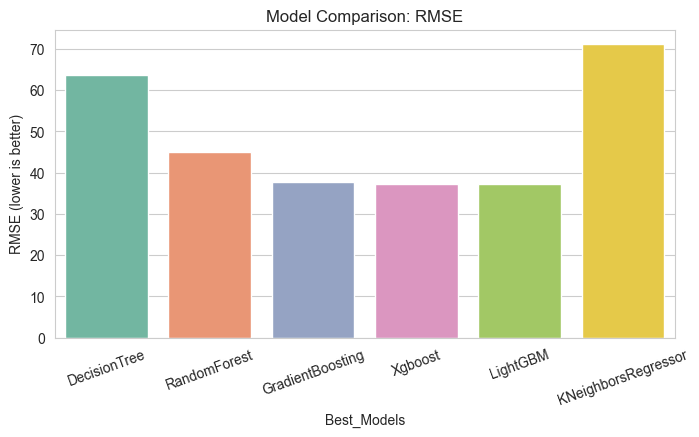

In [140]:
plt.figure(figsize=(8,4))
sns.barplot(x='Best_Models', y='RMSE', data=df_models, palette="Set2")
plt.title("Model Comparison: RMSE")
plt.ylabel("RMSE (lower is better)")
plt.xticks(rotation=20)
plt.savefig("model_comparison_rmse.png")
plt.show()



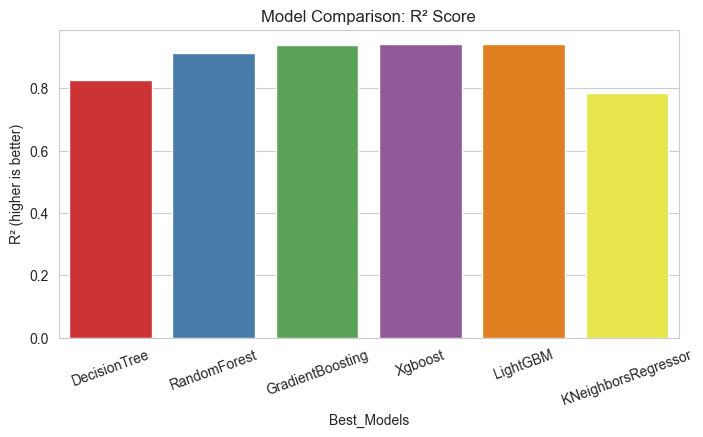

In [141]:
plt.figure(figsize=(8,4))
sns.barplot(x='Best_Models', y='R2', data=df_models, palette="Set1")
plt.title("Model Comparison: R² Score")
plt.ylabel("R² (higher is better)")
plt.xticks(rotation=20)
plt.savefig("Model_comparison_r2.png")
plt.show()


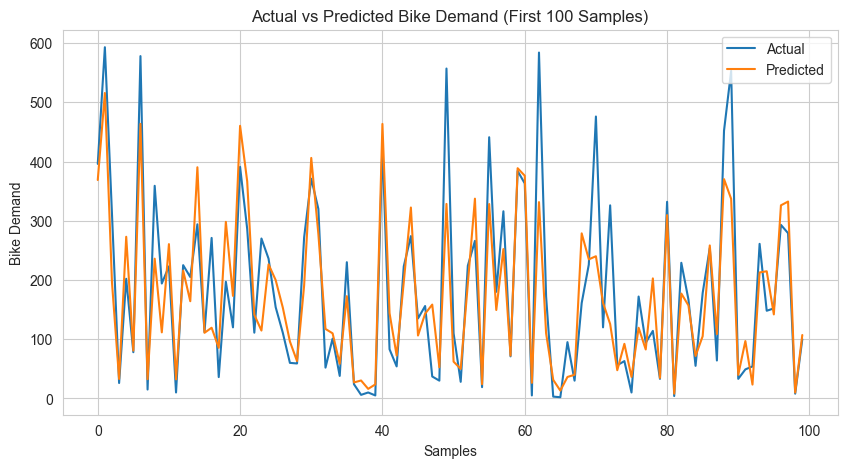

In [142]:
plt.figure(figsize=(10,5))
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred_test[:100], label='Predicted')
plt.xlabel("Samples")
plt.ylabel("Bike Demand")
plt.title("Actual vs Predicted Bike Demand (First 100 Samples)")
plt.legend()
plt.savefig("actual_vs_predicted_bike_demand.png")
plt.show()


# Model Deployment

In [143]:
from sklearn.pipeline import Pipeline
import joblib

pipeline = Pipeline([
    ("scaler", scaler),
    ("model", model)
])
joblib.dump(pipeline, "bike_pipeline.pkl")

['bike_pipeline.pkl']